In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.api import SimpleExpSmoothing

In [2]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv')
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
y = df['Milk']
y_train = df['Milk'].iloc[:-12]
y_test = df['Milk'].iloc[-12:]

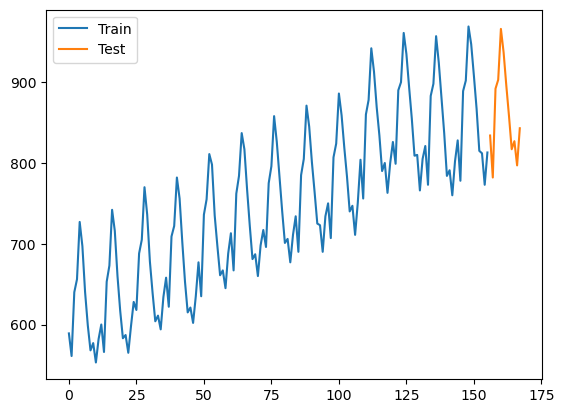

In [6]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

### Simple Exponential Smoothing

c:\Users\HP\miniconda3\envs\da310\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


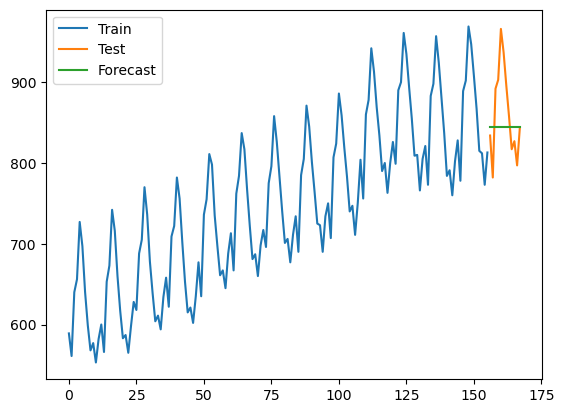

In [15]:
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
plt.legend(loc='best')
plt.show()

In [16]:
print("RMSE =",np.sqrt(mse(y_test, fcast1)))

RMSE = 57.02407775273818


### Holt's Linear Model

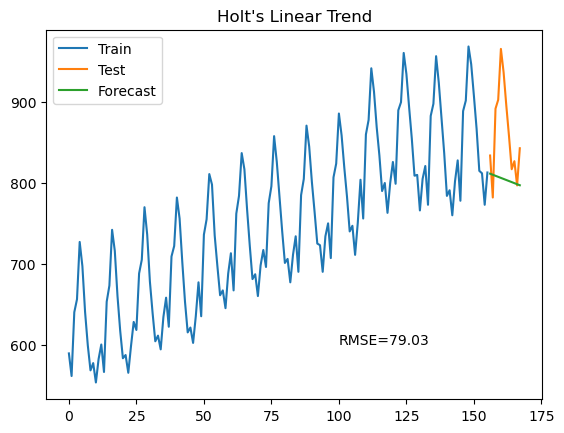

In [20]:
alpha = 0.8
beta = 0.02

### Linear Trend
from statsmodels.tsa.api import Holt
holt = Holt(y_train)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

### Holt's Exponential Method

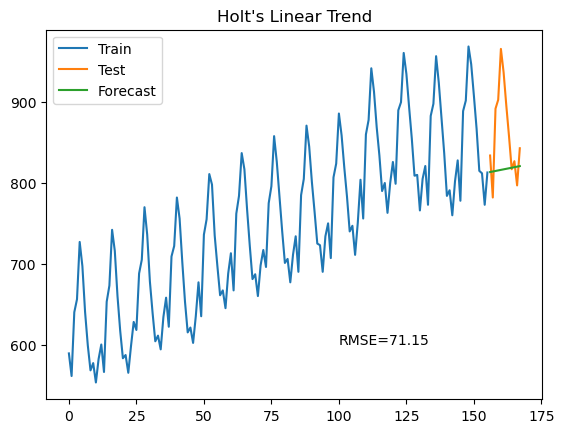

In [21]:
alpha = 0.8
beta = 0.02

holt = Holt(y_train, exponential=True)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

### Additive Damped Trend

c:\Users\HP\miniconda3\envs\da310\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


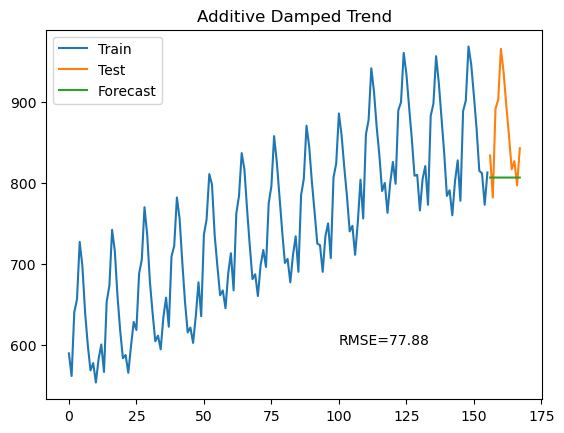

In [22]:
alpha = 0.8
beta = 0.02
phi = 0.1

add_damp = Holt(y_train, damped_trend=True)
fit3 = add_damp.fit(smoothing_level=alpha, 
                    smoothing_trend=beta, 
                    damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast3, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast3)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Additive Damped Trend")
plt.legend(loc='best')
plt.show()

### Multiplicative Damped Trend

c:\Users\HP\miniconda3\envs\da310\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


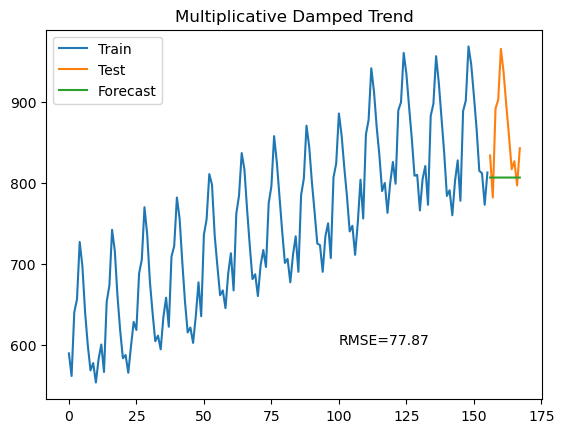

In [25]:
alpha = 0.8
beta = 0.02
phi = 0.1

mul_damp = Holt(y_train, damped_trend=True, exponential=True)
fit3 = mul_damp.fit(smoothing_level=alpha, 
                    smoothing_trend=beta, 
                    damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast3, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast3)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()

### Holt Winter's Seasonal Method

#### Seasonal Additive

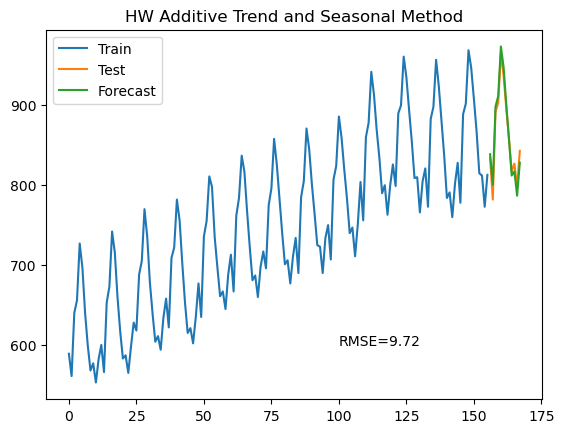

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8
beta = 0.02
gamma = 0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add')
fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

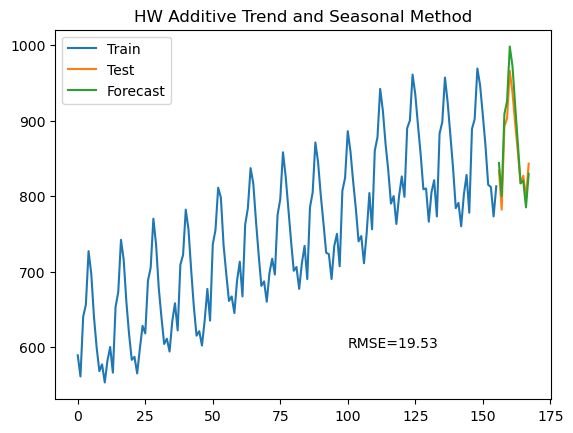

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8
beta = 0.02
gamma = 0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul')
fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

#### Seasonal Additive and Damped

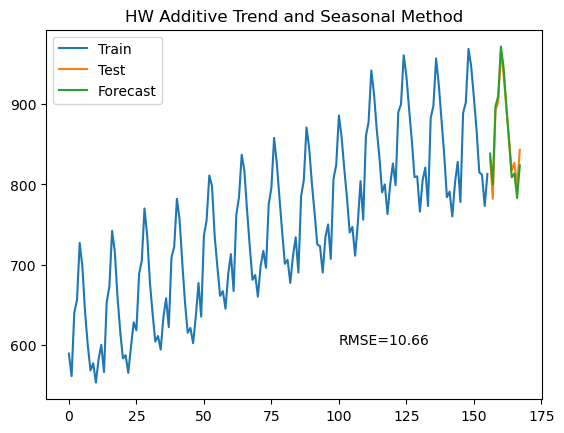

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8
beta = 0.02
gamma = 0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add',
                            damped_trend=True)
fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

#### Seasonal Multiplicative and Damped

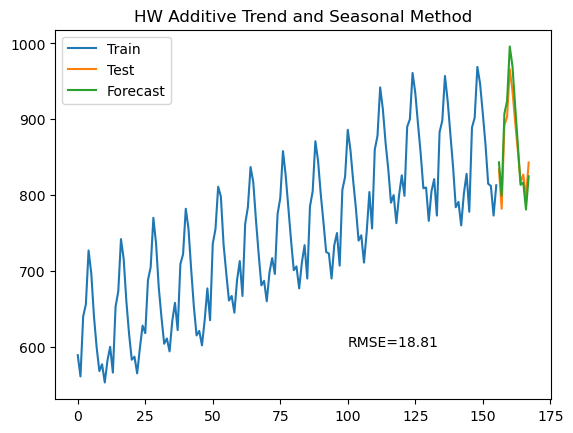

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8
beta = 0.02
gamma = 0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul',
                            damped_trend=True)
fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast1, label='Forecast')
error = round(np.sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

### Seasonal Decomposition

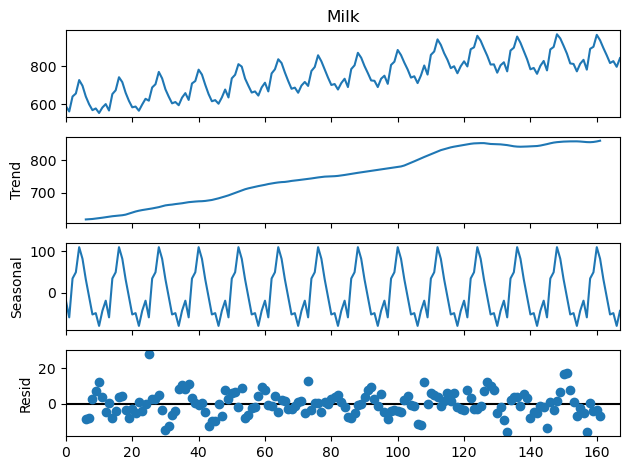

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='additive', period=12)
result.plot();

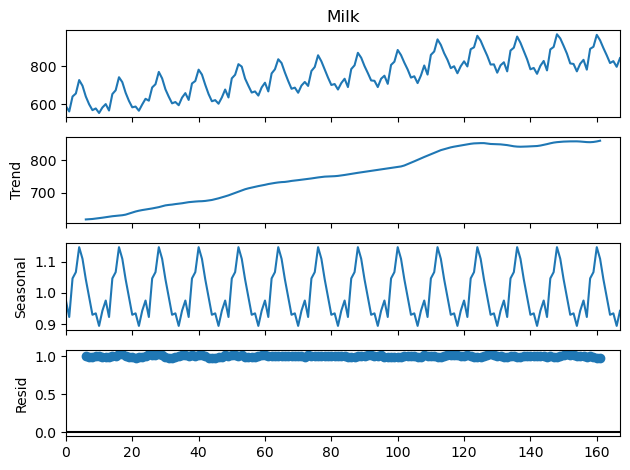

In [34]:
result = seasonal_decompose(y, model='multiplicative', period=12)
result.plot();

### sktime

In [30]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, n_jobs=-1, sp=12)
forecaster.fit(y_train)
print(forecaster.summary())
# y_pred = forecaster.predict(fh=[1,2,3])

ModuleNotFoundError: No module named 'sktime'